### One-Hot Encoding

*** 

### Introduction:

### One-Hot Encoding is a technique used in machine learning and data preprocessing to convert categorical variables into a format that is suitable for numerical and statistical analysis. Categorical variables are those that take on a limited, fixed number of possible values, such as "red," "blue," or "green" for colors, or "dog," "cat," or "bird" for animal types. 

### Since many machine learning algorithms cannot directly operate on categorical data, One-Hot Encoding transforms categorical variables into a binary format, where each category is represented as a binary vector. This method creates new binary columns (or "dummy variables") corresponding to each unique category, with a value of 1 indicating the presence of the category and 0 otherwise. 

### One-Hot Encoding ensures that categorical data can be effectively used as input features for machine learning models, preserving the integrity of categorical information while enabling algorithms to interpret and learn from the data more effectively.

### This section is an extension of the previous section. This time, we will add the location of a hotel as a feature to our Multiple Linear Regression model.

***

### Importing libraries and data

In [1]:
# Importing libraries
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
df = pd.read_excel('hotels.xlsx')
df.head()

,Profit,Price in millions,Square meters,City
0,119000,21.88,3938,Berlin
1,250000,27.95,3986,München
2,250000,16.09,2574,Köln
3,145000,27.58,4155,München
4,110000,23.76,3795,Berlin


### Visualizing the size and price of hotels

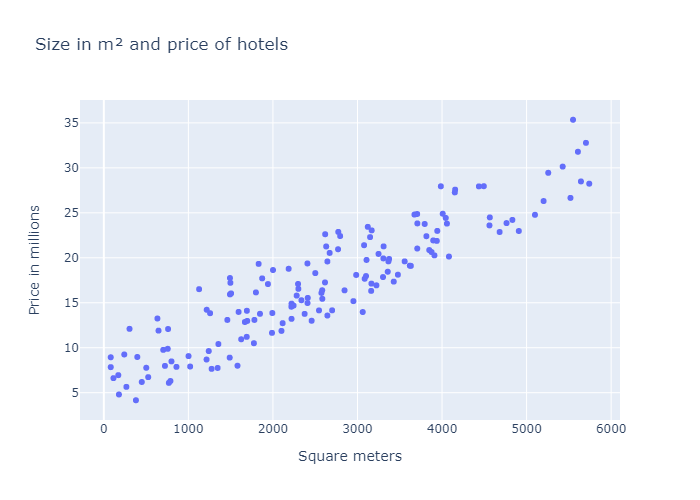

In [3]:
fig = px.scatter(df, x="Square meters", y="Price in millions", title="Size in m² and price of hotels")
fig.show("png")

### Visualizing last year's profit and price of hotels

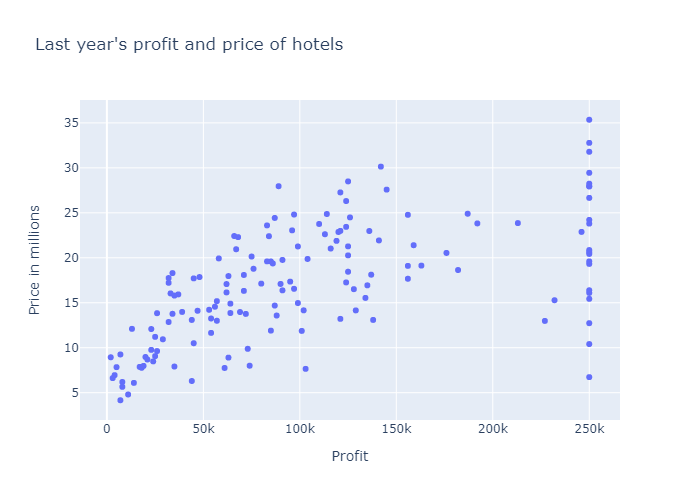

In [4]:
fig = px.scatter(df, x="Profit", y="Price in millions", title="Last year's profit and price of hotels")
fig.show("png")

### One-Hot Encoding the location of hotels

In [5]:
# One-hot encoding the City column
df = pd.get_dummies(df, columns = ['City'], dtype=int)
df.head()

,Profit,Price in millions,Square meters,City_Berlin,City_Köln,City_München
0,119000,21.88,3938,1,0,0
1,250000,27.95,3986,0,0,1
2,250000,16.09,2574,0,1,0
3,145000,27.58,4155,0,0,1
4,110000,23.76,3795,1,0,0


### Building a Multiple Linear Regression model using the size, profit and location of hotels as features

In [6]:
# Define features and target variable
X = df[['Square meters', 'Profit', 'City_Berlin', 'City_Köln']]
y = df[['Price in millions']]

# Performing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Instantiate model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Generating predictions
y_pred = model.predict(X_test)

# Output R² score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9613531186676674


***

### Conclusion: 

### In this project, we utilized One-Hot Encoding to transform categorical city data into a format suitable for machine learning analysis. The categorical variable 'City' was expanded into binary columns using pandas' get_dummies function, creating new features for each city present in the dataset.

### These encoded features, along with square meters and profit margins, were then used as predictors to train a Multiple Linear Regression model for predicting hotel prices. The dataset was split into training and testing sets using a 75/25 ratio to evaluate the model's performance. After training the Linear Regression model on the training data, predictions were generated for the test set. 

### The coefficient of determination (R² score) was computed to assess the model's goodness of fit to the test data, resulting in a score of 0.96. Overall, One-Hot Encoding proved effective in integrating categorical data into the regression model, increasing model accuracy and showcasing its importance in preprocessing categorical variables for machine learning tasks.